# imports

In [35]:
import sys
sys.path.append('../src/')

from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from tqdm import tqdm_notebook as tqdm

from data import get_loader
from filters import kalman_filter
from models import CNN
from utils import draw_weights, init_model, plot_density, plot_training, validate

# config

In [2]:
batch_size = 256
dataset = 'mnist'
epochs = 20
learning_rate = 1e-1
log_intv = 50

device = torch.device('cuda:0')

# dataloader and model

In [3]:
trainloader = get_loader(dataset, batch_size, train=True)
testloader = get_loader(dataset, batch_size, train=False)

model = CNN().to(device)
init_model(model)

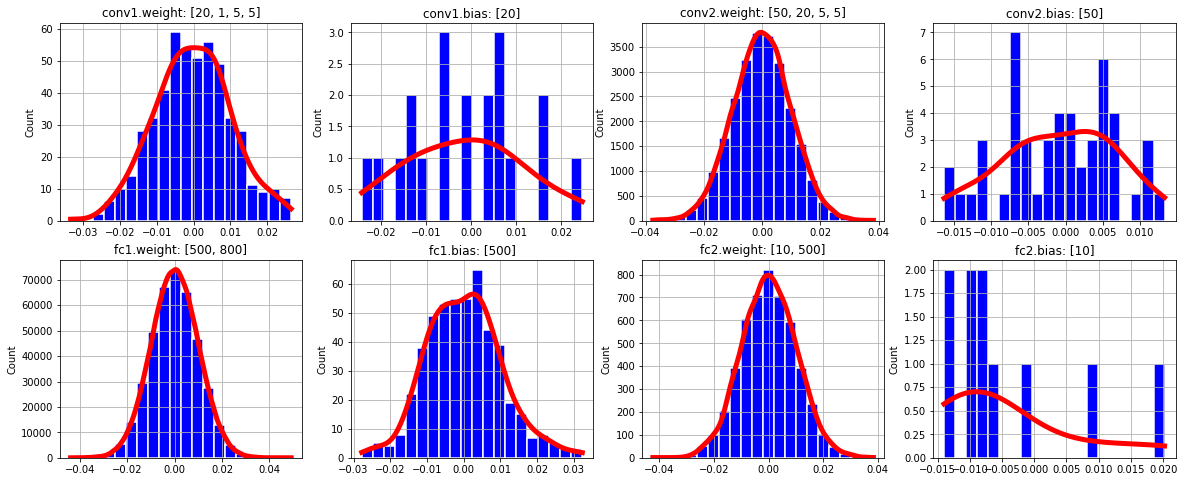

In [4]:
plot_density(model, bins=20)

# training

In [5]:
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

- $\mu_k(0)$ and $\sigma_k(0)$ is initialized for the model
- Also, initialize estimate covariances $P_{\mu}(0)$ and $P_{\sigma}(0)$
- Initialize small values of $\sigma_{\mu}$, $\tilde{\sigma}_{\mu}$, $\sigma_{\sigma}$, $\tilde{\sigma}_{\sigma}$

In [6]:
std_mu = 1e-4
std_mu_ = 1e-4
std_var = 1e-4
std_var_ = 1e-4

In [7]:
model_mu = OrderedDict()
model_var = OrderedDict()
P_mu = OrderedDict()
P_var = OrderedDict()

for name, param in model.named_parameters():
    model_mu[name] = torch.zeros(param.size())
    model_var[name] = torch.ones(param.size())*(0.01**2)
    
    P_mu[name] = torch.zeros(param.size())
    P_var[name] = torch.zeros(param.size())

[epoch:   1, batch:    0] loss: 2.302122 	 acc: 0.10
[epoch:   1, batch:   50] loss: 2.301596 	 acc: 0.12
[epoch:   1, batch:  100] loss: 2.298078 	 acc: 0.11
[epoch:   1, batch:  150] loss: 2.036588 	 acc: 0.37
[epoch:   1, batch:  200] loss: 0.706531 	 acc: 0.78


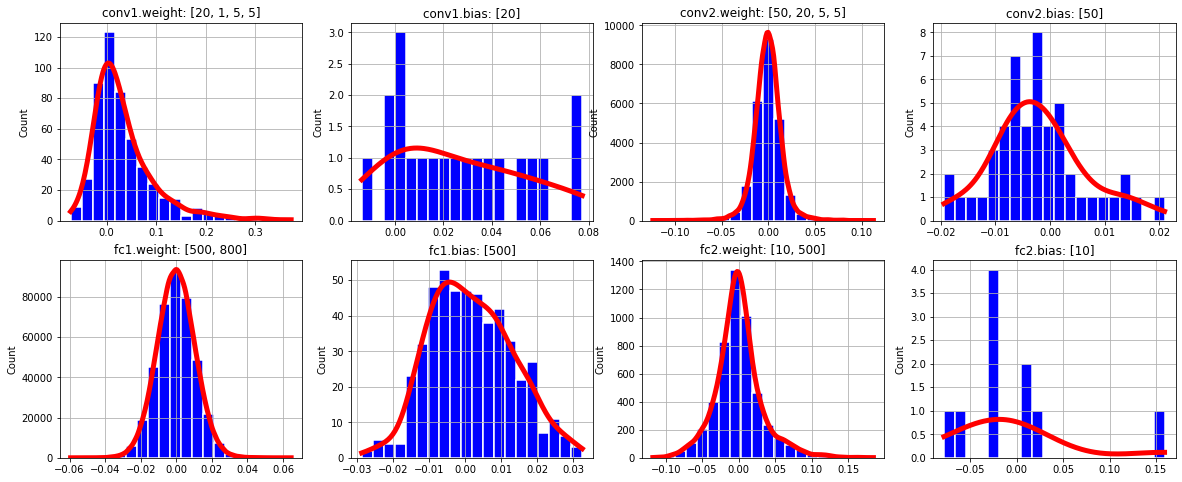

[epoch:   2, batch:    0] loss: 0.296545 	 acc: 0.89
[epoch:   2, batch:   50] loss: 0.224209 	 acc: 0.93
[epoch:   2, batch:  100] loss: 0.174431 	 acc: 0.94
[epoch:   2, batch:  150] loss: 0.133394 	 acc: 0.96
[epoch:   2, batch:  200] loss: 0.128713 	 acc: 0.96


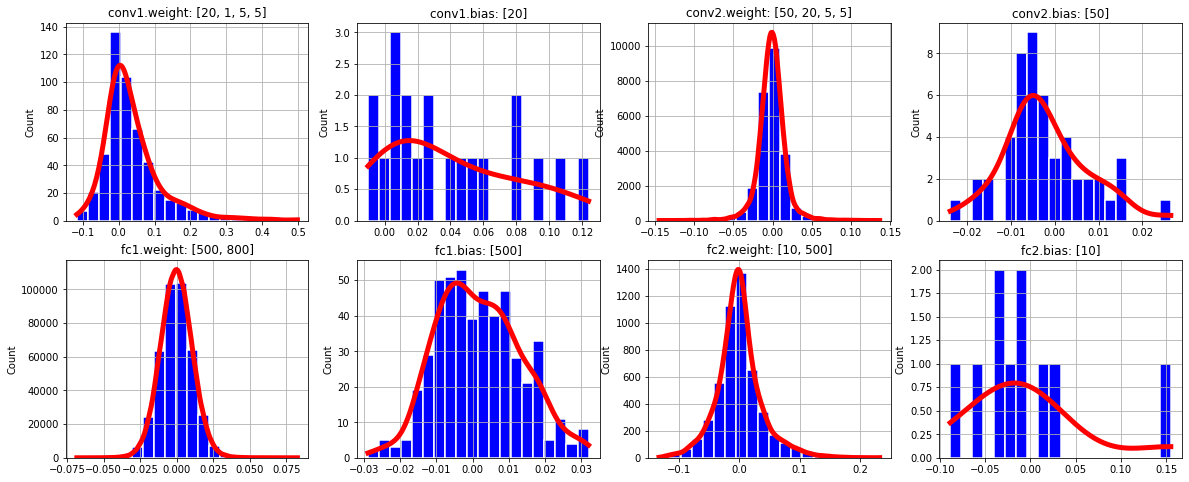

[epoch:   3, batch:    0] loss: 0.072473 	 acc: 0.97
[epoch:   3, batch:   50] loss: 0.093316 	 acc: 0.97
[epoch:   3, batch:  100] loss: 0.092138 	 acc: 0.97
[epoch:   3, batch:  150] loss: 0.085829 	 acc: 0.97
[epoch:   3, batch:  200] loss: 0.088005 	 acc: 0.97


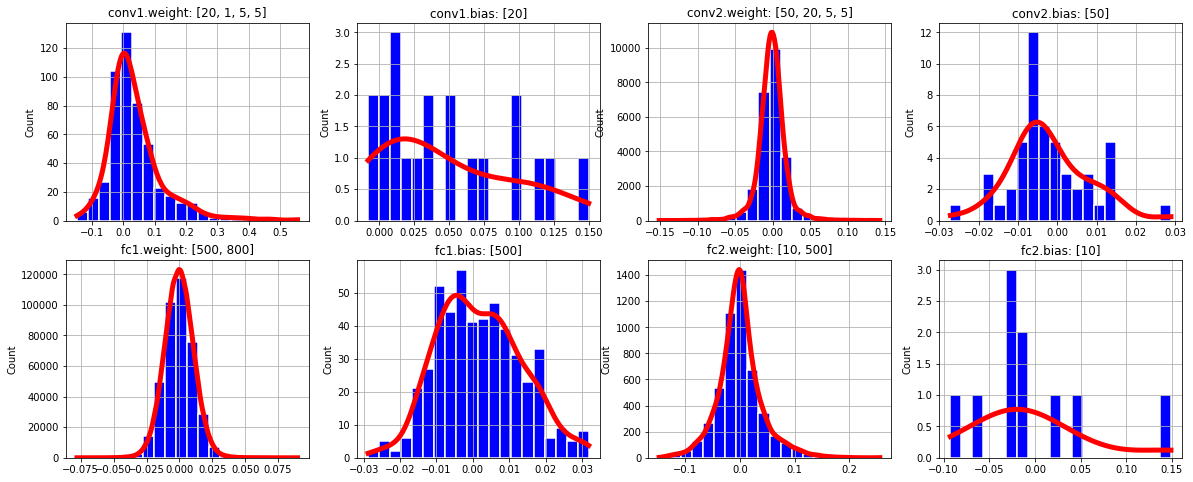

[epoch:   4, batch:    0] loss: 0.105494 	 acc: 0.96
[epoch:   4, batch:   50] loss: 0.068343 	 acc: 0.98
[epoch:   4, batch:  100] loss: 0.066773 	 acc: 0.98
[epoch:   4, batch:  150] loss: 0.071295 	 acc: 0.98
[epoch:   4, batch:  200] loss: 0.060260 	 acc: 0.98


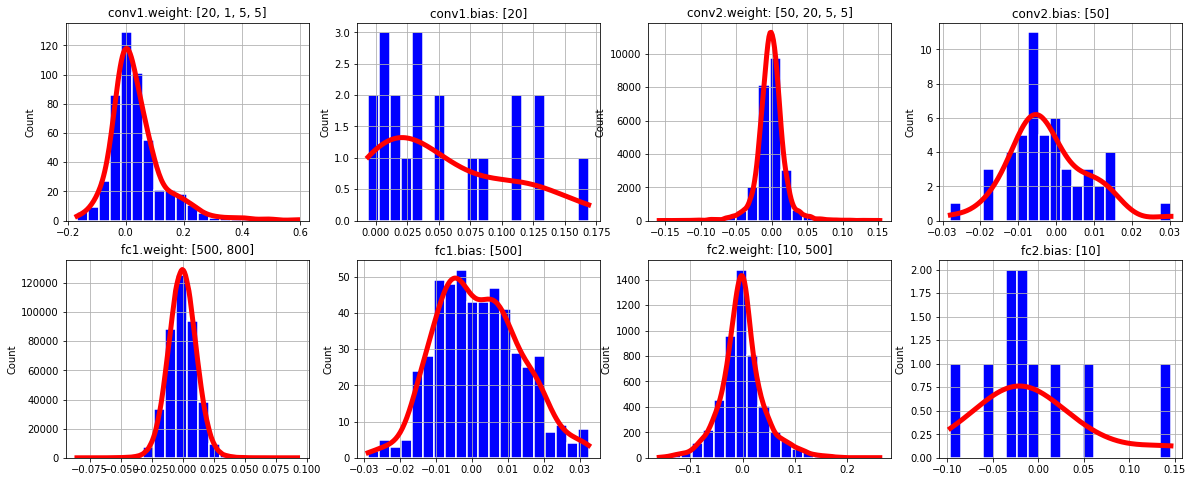

[epoch:   5, batch:    0] loss: 0.060355 	 acc: 0.98
[epoch:   5, batch:   50] loss: 0.056145 	 acc: 0.98
[epoch:   5, batch:  100] loss: 0.050275 	 acc: 0.98
[epoch:   5, batch:  150] loss: 0.053604 	 acc: 0.98
[epoch:   5, batch:  200] loss: 0.053383 	 acc: 0.98


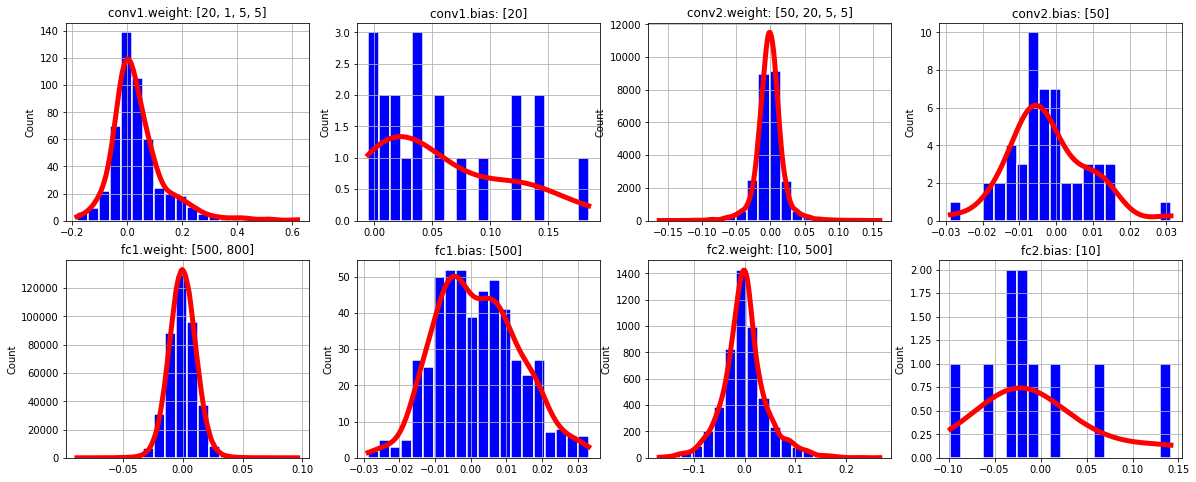

[epoch:   6, batch:    0] loss: 0.054582 	 acc: 0.98
[epoch:   6, batch:   50] loss: 0.043879 	 acc: 0.99
[epoch:   6, batch:  100] loss: 0.049205 	 acc: 0.98
[epoch:   6, batch:  150] loss: 0.042665 	 acc: 0.99
[epoch:   6, batch:  200] loss: 0.038797 	 acc: 0.99


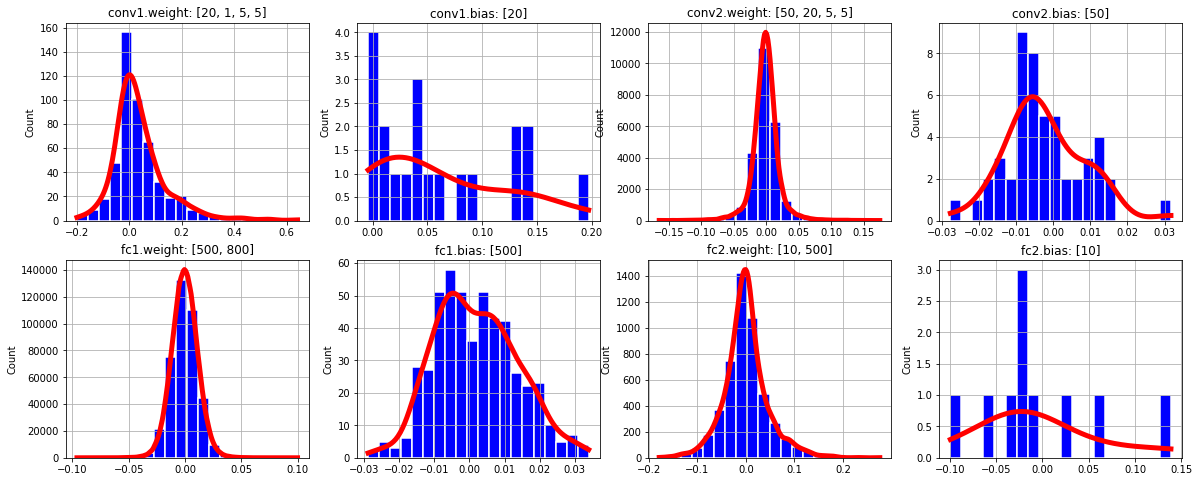

[epoch:   7, batch:    0] loss: 0.027539 	 acc: 1.00
[epoch:   7, batch:   50] loss: 0.036929 	 acc: 0.99
[epoch:   7, batch:  100] loss: 0.038895 	 acc: 0.99
[epoch:   7, batch:  150] loss: 0.039511 	 acc: 0.99
[epoch:   7, batch:  200] loss: 0.036765 	 acc: 0.99


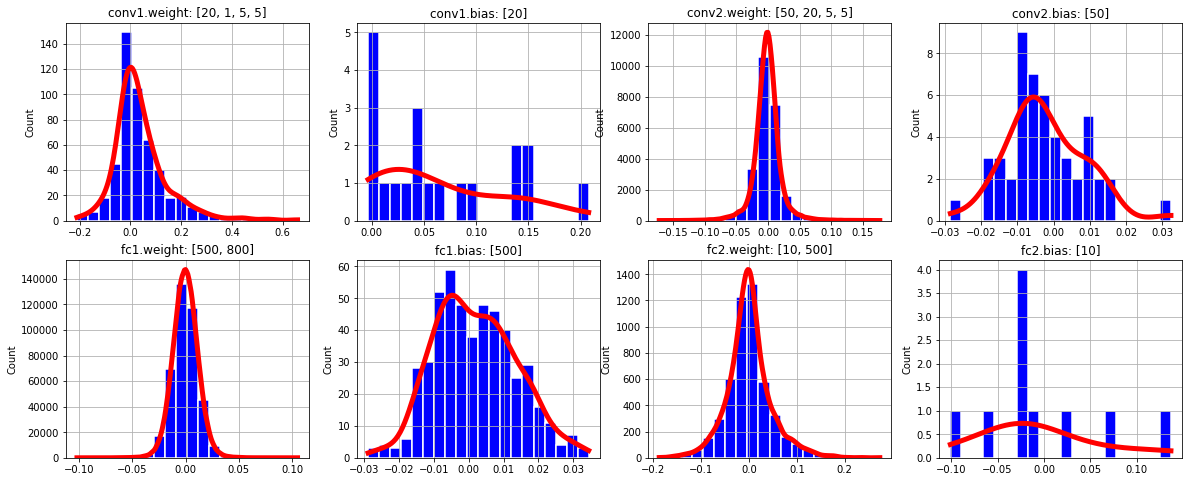

[epoch:   8, batch:    0] loss: 0.035111 	 acc: 0.99
[epoch:   8, batch:   50] loss: 0.029318 	 acc: 0.99
[epoch:   8, batch:  100] loss: 0.032044 	 acc: 0.99
[epoch:   8, batch:  150] loss: 0.032117 	 acc: 0.99
[epoch:   8, batch:  200] loss: 0.029676 	 acc: 0.99


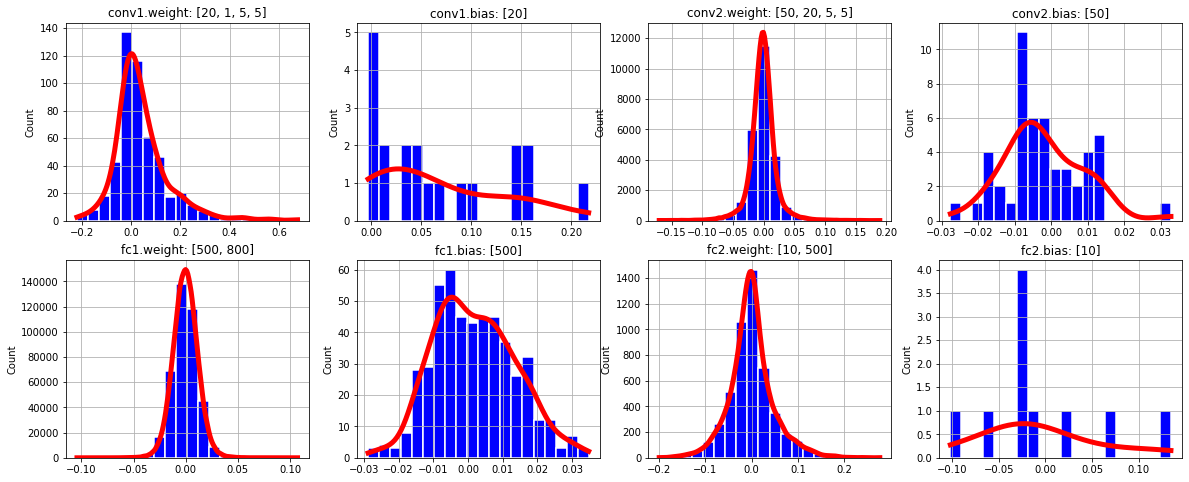

[epoch:   9, batch:    0] loss: 0.024789 	 acc: 0.99
[epoch:   9, batch:   50] loss: 0.028574 	 acc: 0.99
[epoch:   9, batch:  100] loss: 0.029778 	 acc: 0.99
[epoch:   9, batch:  150] loss: 0.030054 	 acc: 0.99
[epoch:   9, batch:  200] loss: 0.028009 	 acc: 0.99


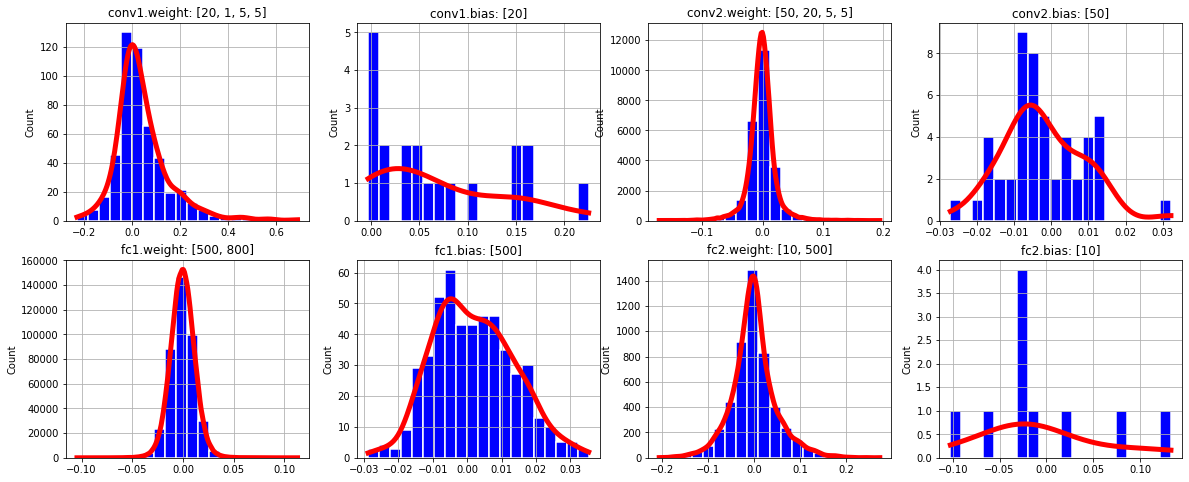

[epoch:  10, batch:    0] loss: 0.016990 	 acc: 1.00
[epoch:  10, batch:   50] loss: 0.023869 	 acc: 0.99
[epoch:  10, batch:  100] loss: 0.022203 	 acc: 0.99
[epoch:  10, batch:  150] loss: 0.026794 	 acc: 0.99
[epoch:  10, batch:  200] loss: 0.024778 	 acc: 0.99


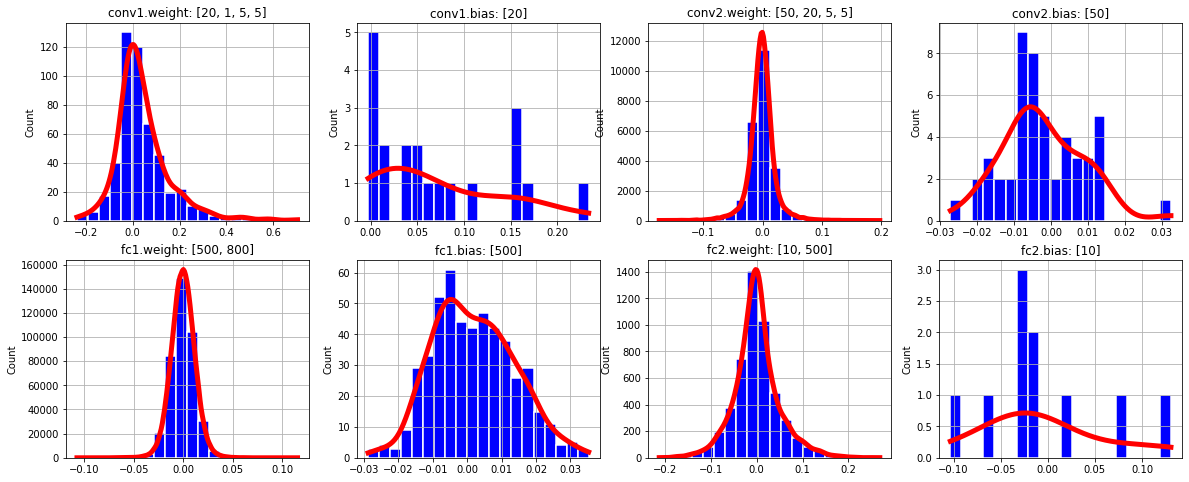

[epoch:  11, batch:    0] loss: 0.008516 	 acc: 1.00
[epoch:  11, batch:   50] loss: 0.019809 	 acc: 0.99
[epoch:  11, batch:  100] loss: 0.018004 	 acc: 0.99
[epoch:  11, batch:  150] loss: 0.020969 	 acc: 0.99
[epoch:  11, batch:  200] loss: 0.024102 	 acc: 0.99


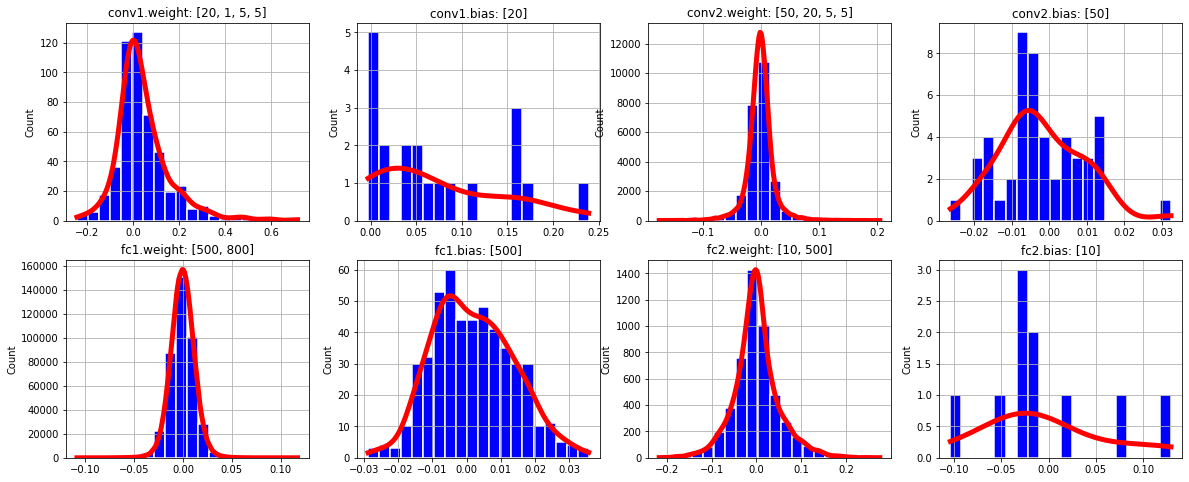

[epoch:  12, batch:    0] loss: 0.023366 	 acc: 0.99
[epoch:  12, batch:   50] loss: 0.018861 	 acc: 0.99
[epoch:  12, batch:  100] loss: 0.017719 	 acc: 0.99
[epoch:  12, batch:  150] loss: 0.021185 	 acc: 0.99
[epoch:  12, batch:  200] loss: 0.018315 	 acc: 0.99


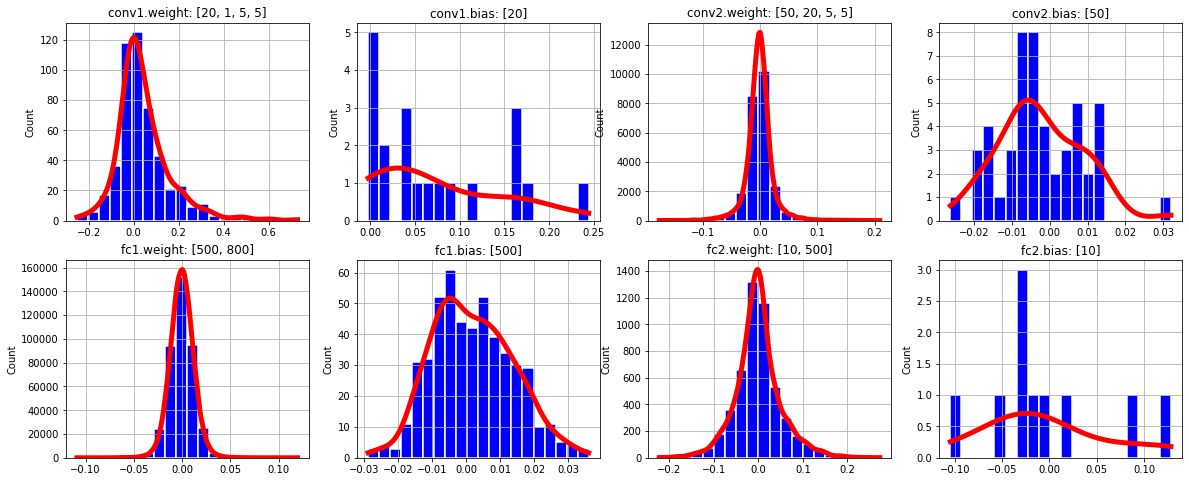

[epoch:  13, batch:    0] loss: 0.035293 	 acc: 0.99
[epoch:  13, batch:   50] loss: 0.016021 	 acc: 1.00
[epoch:  13, batch:  100] loss: 0.014155 	 acc: 1.00
[epoch:  13, batch:  150] loss: 0.017302 	 acc: 0.99
[epoch:  13, batch:  200] loss: 0.022107 	 acc: 0.99


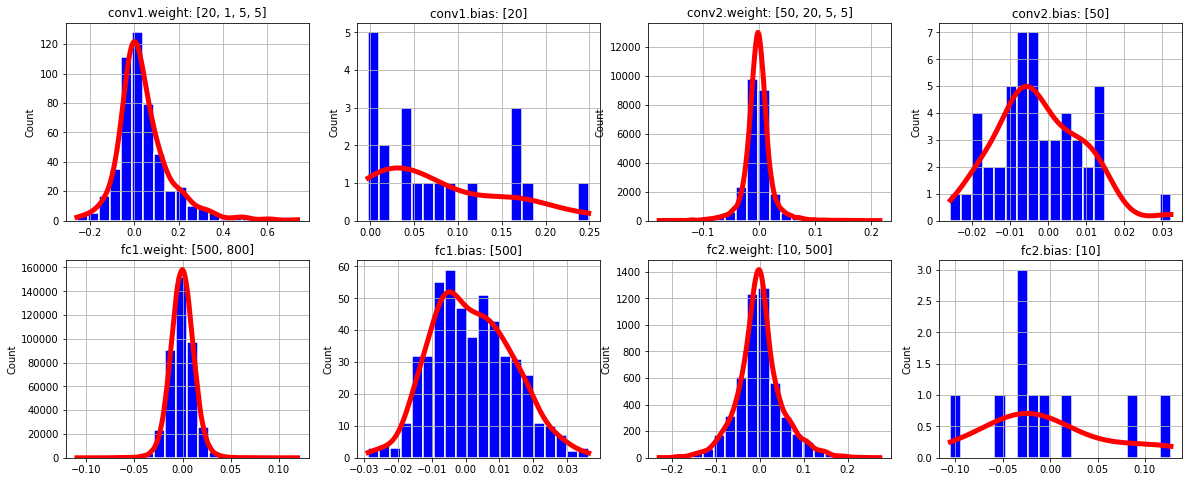

[epoch:  14, batch:    0] loss: 0.027332 	 acc: 0.99
[epoch:  14, batch:   50] loss: 0.013656 	 acc: 1.00
[epoch:  14, batch:  100] loss: 0.014568 	 acc: 1.00
[epoch:  14, batch:  150] loss: 0.014697 	 acc: 0.99
[epoch:  14, batch:  200] loss: 0.015264 	 acc: 0.99


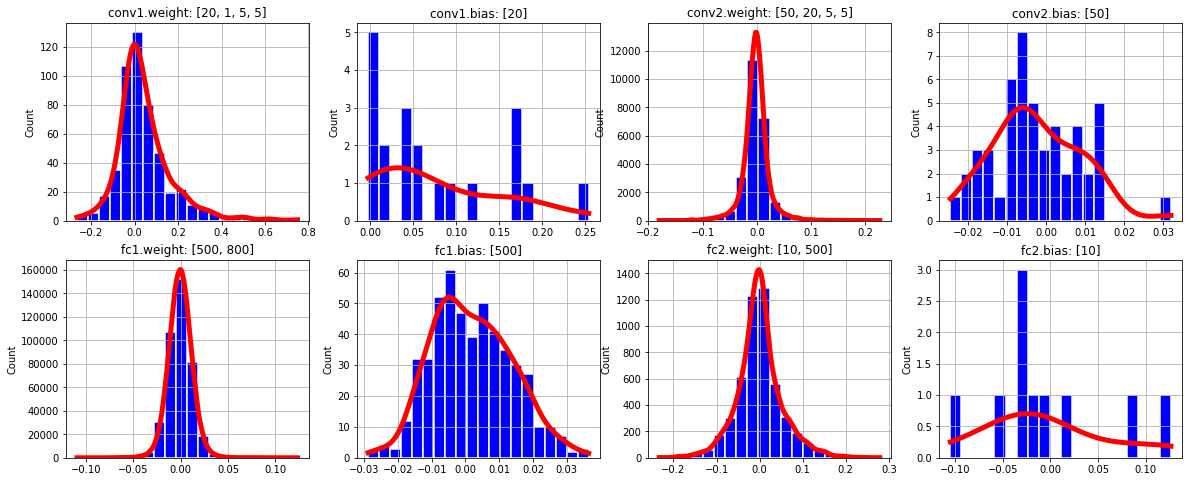

[epoch:  15, batch:    0] loss: 0.082440 	 acc: 0.98
[epoch:  15, batch:   50] loss: 0.011569 	 acc: 1.00
[epoch:  15, batch:  100] loss: 0.012254 	 acc: 1.00
[epoch:  15, batch:  150] loss: 0.015197 	 acc: 1.00
[epoch:  15, batch:  200] loss: 0.014809 	 acc: 1.00


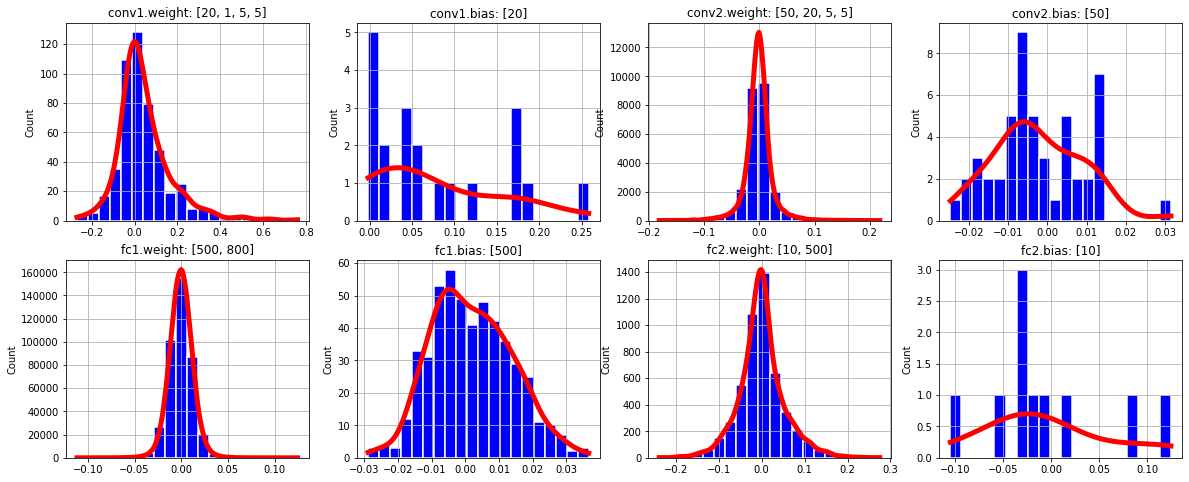

[epoch:  16, batch:    0] loss: 0.038751 	 acc: 0.98
[epoch:  16, batch:   50] loss: 0.011995 	 acc: 1.00
[epoch:  16, batch:  100] loss: 0.012200 	 acc: 1.00
[epoch:  16, batch:  150] loss: 0.013522 	 acc: 1.00
[epoch:  16, batch:  200] loss: 0.012204 	 acc: 1.00


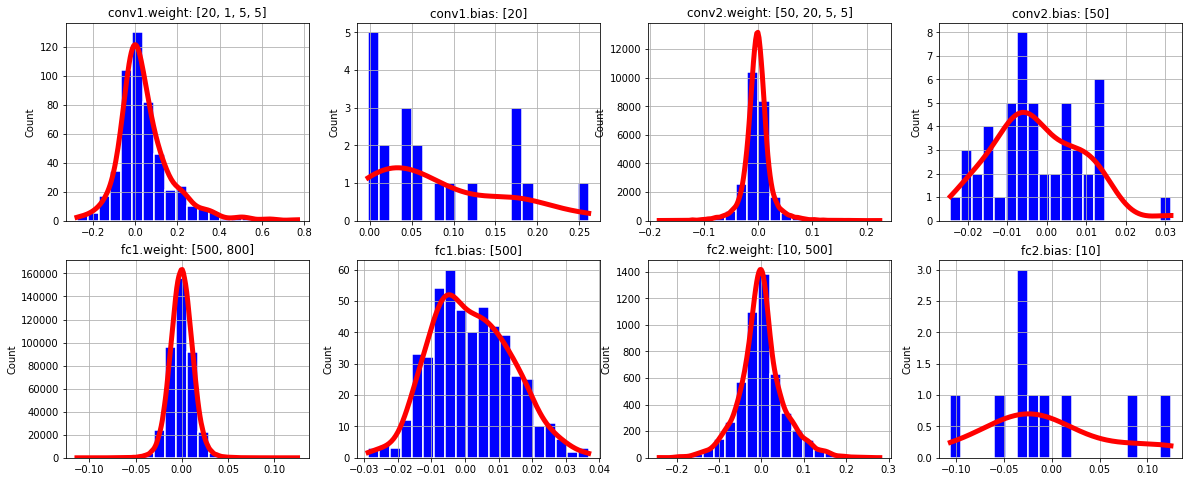

[epoch:  17, batch:    0] loss: 0.014192 	 acc: 1.00
[epoch:  17, batch:   50] loss: 0.008995 	 acc: 1.00
[epoch:  17, batch:  100] loss: 0.012555 	 acc: 1.00
[epoch:  17, batch:  150] loss: 0.009447 	 acc: 1.00
[epoch:  17, batch:  200] loss: 0.012268 	 acc: 1.00


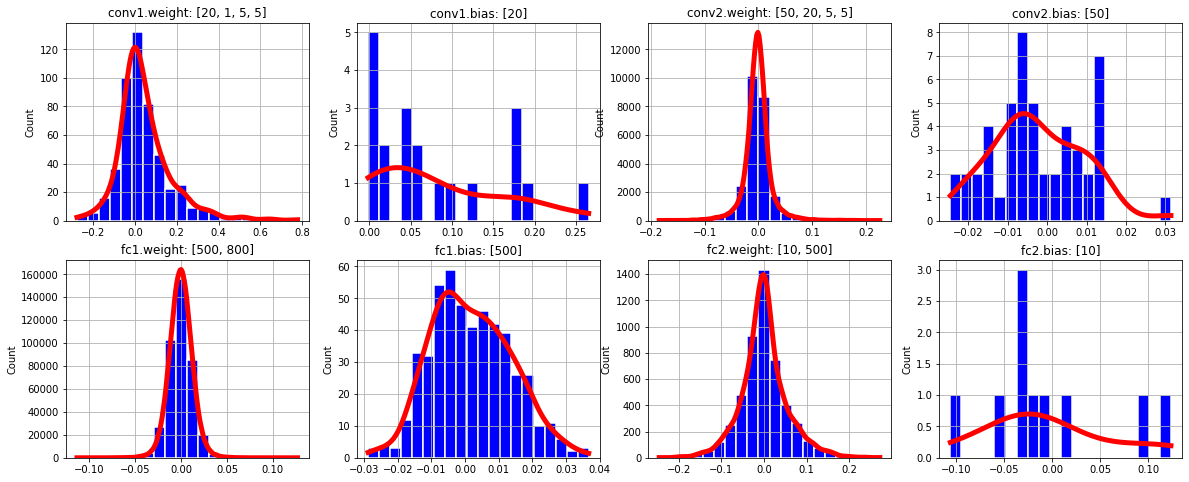

[epoch:  18, batch:    0] loss: 0.010908 	 acc: 1.00
[epoch:  18, batch:   50] loss: 0.009816 	 acc: 1.00
[epoch:  18, batch:  100] loss: 0.006757 	 acc: 1.00
[epoch:  18, batch:  150] loss: 0.011502 	 acc: 1.00
[epoch:  18, batch:  200] loss: 0.009149 	 acc: 1.00


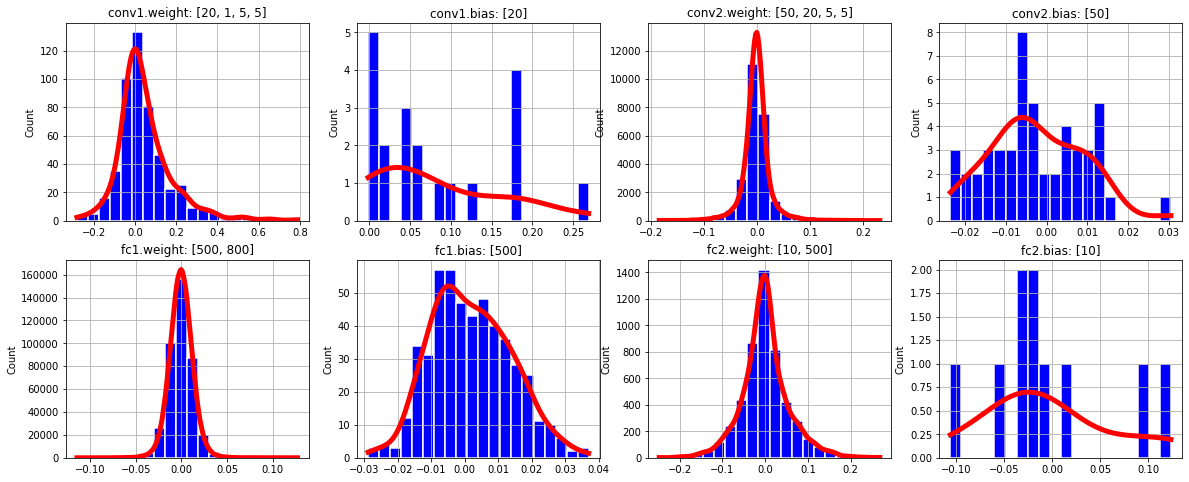

[epoch:  19, batch:    0] loss: 0.010260 	 acc: 1.00
[epoch:  19, batch:   50] loss: 0.007507 	 acc: 1.00
[epoch:  19, batch:  100] loss: 0.008027 	 acc: 1.00
[epoch:  19, batch:  150] loss: 0.008681 	 acc: 1.00
[epoch:  19, batch:  200] loss: 0.007785 	 acc: 1.00


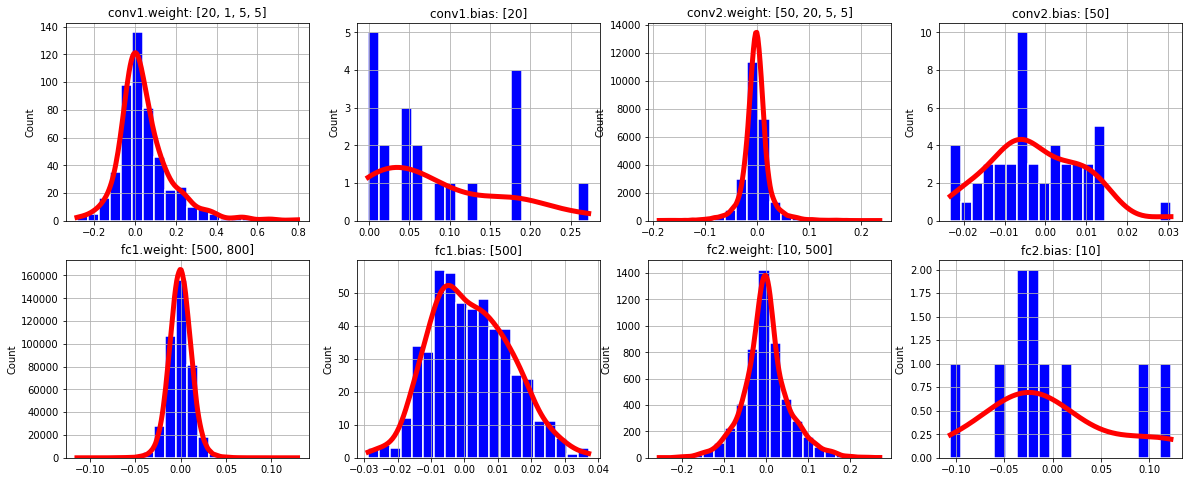

[epoch:  20, batch:    0] loss: 0.005103 	 acc: 1.00
[epoch:  20, batch:   50] loss: 0.006507 	 acc: 1.00
[epoch:  20, batch:  100] loss: 0.006012 	 acc: 1.00
[epoch:  20, batch:  150] loss: 0.007100 	 acc: 1.00
[epoch:  20, batch:  200] loss: 0.006265 	 acc: 1.00


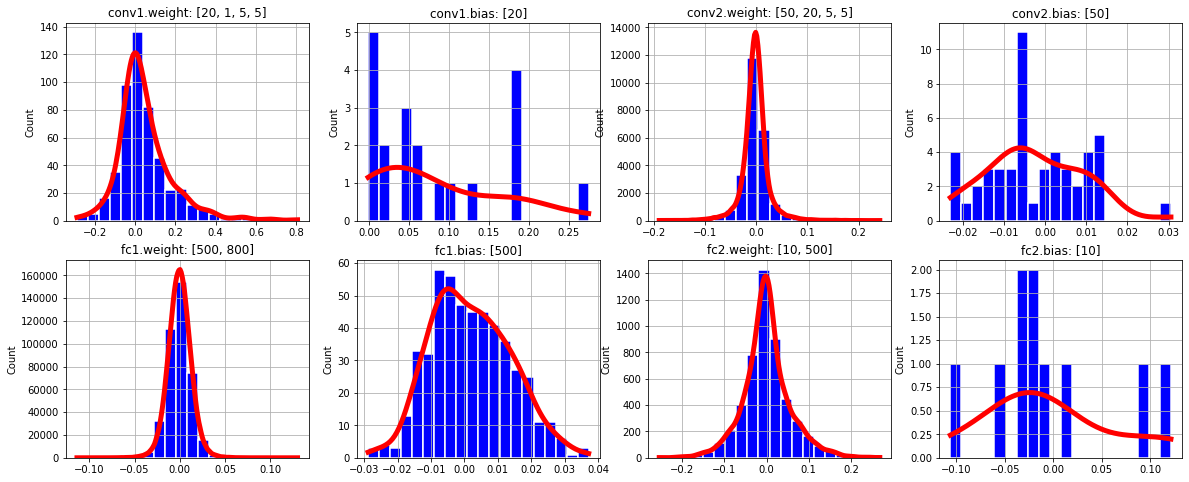

In [8]:
h_epoch, h_acc, h_loss = [], [], []
for epoch in range(1, epochs+1):
    
    running_loss = 0.0
    running_acc = 0.0
    running_count = 0
    epoch_loss = 0
    epoch_acc = 0
    for i, (Y, X) in enumerate(trainloader):
        Y, X = Y.to(device), X.to(device)
        
        X_ = model(Y)
        loss = loss_fn(X_, X)
        running_loss += loss.item()
        optim.zero_grad()
        loss.backward()
        optim.step()
        pred = X_.argmax(axis=1, keepdim=True)
        running_acc += pred.eq(X.view_as(pred)).sum().item()/len(X)
        running_count += 1
        
        # logging
        if i % log_intv == 0:
            epoch_loss = running_loss/running_count
            epoch_acc = running_acc/running_count
            print('[epoch: {:3d}, batch: {:4d}] loss: {:.6f} \t acc: {:.2f}'.format(
                epoch, i, epoch_loss, epoch_acc))
            running_loss = 0.0
            running_acc = 0.0
            running_count = 0 
            
        # kalman filtering
        model_mu, model_var, P_mu, P_var = kalman_filter(
            model, learning_rate, 
            model_mu, model_var, P_mu, P_var,
            std_mu, std_mu_, std_var, std_var_
        )

    h_epoch.append(epoch)
    h_acc.append(epoch_acc)
    h_loss.append(epoch_loss)
    plot_density(model, bins=20)

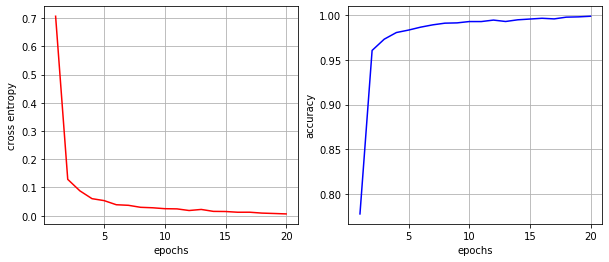

In [9]:
plot_training(h_epoch, h_acc, h_loss)

# validate training

In [10]:
validate(model, testloader, device)

0.9893

# draw model

In [11]:
drawn_weights = draw_weights(model_mu, model_var, device)
drawn_model = CNN().to(device)
drawn_model.load_state_dict(drawn_weights)

<All keys matched successfully>

In [12]:
validate(drawn_model, testloader, device)

0.9897

# further visualization

In [61]:
def scatter_validate(model, loader, device, noise=False):
    true, pred = [], []
    for Y, X in loader:
        true += X.tolist()
        if noise:
            Y += torch.normal(0.0, noise, size=Y.size())
        Y = Y.to(device)
        X_ = model(Y).argmax(axis=1, keepdim=True)
        pred += X_.cpu().tolist()
    return true, pred

In [24]:
testloader = get_loader(dataset, batch_size, train=False, shuffle=False)

In [90]:
multi_pred = []
for i in tqdm(range(50)):
    drawn_model = CNN().to(device)
    drawn_model.load_state_dict(draw_weights(model_mu, model_var, device))
    _, p = scatter_validate(drawn_model, testloader, device)
    multi_pred.append(p)
true, pred = scatter_validate(model, testloader, device)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


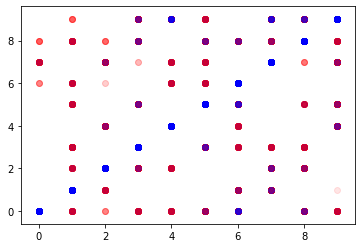

In [70]:
for p in multi_pred:
    plt.scatter(true, p, color='r', alpha=0.1)
plt.scatter(true, pred, color='b', alpha=0.2)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


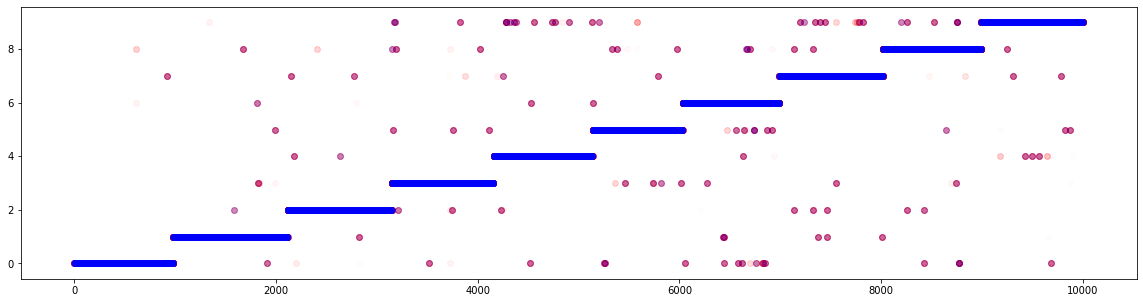

In [92]:
plt.figure(figsize=(20, 5))
x_axis = np.array(range(10000))
true = np.array(true)
idx = np.argsort(true)
# idx = idx[::10]
x_axis = np.array(range(len(idx)))
for p in tqdm(multi_pred):
    plt.scatter(x_axis, np.array(p)[idx], color='r', alpha=0.5/50)
plt.scatter(x_axis, np.array(pred)[idx], color='b', alpha=0.2)
plt.show()

In [ ]:
multi_pred_noisy = []
for i in tqdm(range(50)):
    drawn_model = CNN().to(device)
    drawn_model.load_state_dict(draw_weights(model_mu, model_var, device))
    _, p = scatter_validate(drawn_model, testloader, device, 1.0)
    multi_pred_noisy.append(p)

In [82]:
true, pred = scatter_validate(model, testloader, device, 1.0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


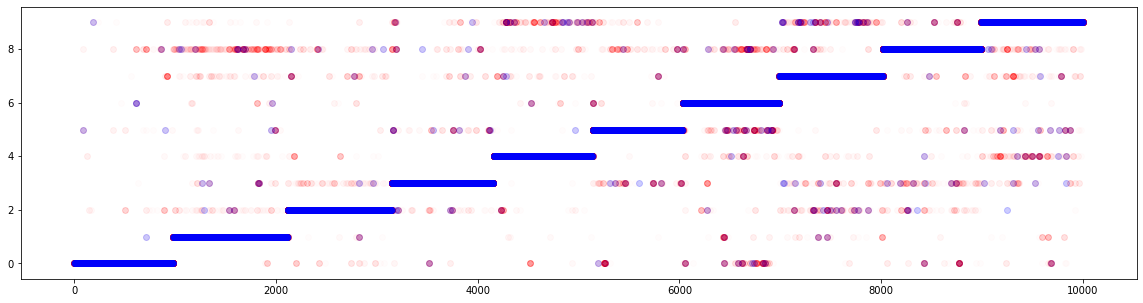

In [89]:
plt.figure(figsize=(20, 5))
x_axis = np.array(range(10000))
true = np.array(true)
idx = np.argsort(true)
# idx = idx[::2]
x_axis = np.array(range(len(idx)))
for p in tqdm(multi_pred_noisy):
    plt.scatter(x_axis, np.array(p)[idx], color='r', alpha=0.5/50)
plt.scatter(x_axis, np.array(pred)[idx], color='b', alpha=0.2)
plt.show()